# COVID-19 VACCINATION DATASET ANALYSIS

# TABLE OF CONTENTS
1. [PROBLEM DESCRIPTION](#prob)
2. [THE DATA](#data)
    1. [Main Data](#maindata)
    2. [Supplemental Data](#supdata)
3. [BACKGROUND RESEARCH](#research)
4. [READ IN THE DATA](#read)
5. [GETTING TO KNOW THE DATA](#know)
6. [DATA PREPARATION](#prepare)
    1. [Vaccination Data](#Vaccination)
        1. [Missing values](#missing1)
        2. [Rename columns](#rename1)
    2. [Coronavirus Data](#Coronavirus)
        1. [Missing values](#missing2)
        2. [Rename columns](#rename2)
    3. [GDP Data](#GDP)
        1. [Missing values](#missing3)
        2. [Rename columns](#rename3)
    4. [Additional Data](#additional)
    5. [Life Expectancy Data](#life)
        1. [Missing values](#missing4)
        2. [Rename columns](#rename4)
7. [GETTING READY TO COMBINE THE DATASETS](#combine_ready)
    1. [Merge two main datasets](#mergemain)
    2. [Merge two supplemental datasets](#mergesup)
    3. [Rename columns](#rename5)
8. [COMBINE THE DATASETS](#combine)
    1. [Combine datasets](#combinedatasets)
    2. [Missing values](#missing5)
9. [ANALYSIS](#analysis)
10. [FIND CORRELATIONS](#find_corr)
    1. [Correlations Plots](#corr_plots)
        1. [Positive Correlations Plot](#pos_corr_plot)
        2. [Negative Correlations Plot](#neg_corr_plot)
    2. [Correlations Analysis](#corr_analysis)
11. [CONCLUSION](#conclusion)

# PROBLEM DESCRIPTION<a id='prob'></a>

COVID-19 has impacted the life of everyone today, and we are still in the battle with the pandemic for more than a year now. As we are adjusting to the new normal, scientists are working day and night to develop the best anti-vaccine to the COVID-19 virus.

However, once the vaccine was out, many people had a lot of second-thoughts on whether the vaccination will be 100% effective or not. The below analysis of the COVID-19 data includes a detailed analysis of the vaccination data from each country and whether or not people are getting vaccinated to prevent the infection of Coronavirus.

# THE DATA<a id='data'></a>

# Main Datasets<a id='maindata'></a>

This project includes 2 main datasets for its analysis. 
The main datasets used are:
- __country_vaccinations_main.csv__ - Vaccinations of countries
- __worldometer_coronavirus_summary_data.csv__ - Status of covid of countries

The first dataset includes 7337 rows and 15 columns. The [dataset](https://www.kaggle.com/gpreda/covid-world-vaccination-progress) was obtained from Kaggle. 

The second [dataset](https://www.kaggle.com/josephassaker/covid19-global-dataset?select=worldometer_coronavirus_summary_data.csv) contains the daily data for the COVID data and it was also obtained from Kaggle. This dataset contains 219 rows and 12 columns.

Vaccinations for the Coronavirus have been developed and are now in circulation for people to get vaccinated to prevent COVID-19 spread. The first dataset contains the vaccination data and the second dataset contains information about the status of the COVID-19 in different countries. Further in the analysis, when these 2 datasets are combined along with some supplemental datasets, the COVID-19 status can be further analyzed to get a clear picture.

Now let's go ahead and have a look at these datasets.

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [16]:
data_vaccination = pd.read_csv("country_vaccinations_main.csv")
data_vaccination.head(3)

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...


In [17]:
data_covid = pd.read_csv("coronavirus_summary_data_main.csv")
data_covid.head(3)

,country,continent,total_confirmed,total_deaths,total_recovered,active_cases,serious_or_critical,total_cases_per_1m_population,total_deaths_per_1m_population,total_tests,total_tests_per_1m_population,population
0,Afghanistan,Asia,56069,2462.0,49664.0,3943.0,1097.0,1418,62.0,328252.0,8300.0,39547320
1,Albania,Europe,119528,2106.0,83264.0,34158.0,46.0,41567,732.0,518673.0,180373.0,2875555
2,Algeria,Africa,115842,3051.0,80347.0,32444.0,15.0,2608,69.0,NaN,NaN,44411333


# SUPPLEMENTAL DATA<a id='supdata'></a>

To support our analysis, three more datasets were used. They are:

- __WB_GDP_per_Cap_supplemental.csv__ - contains the information about GDP of all the countries

- __WB_life_expect_supplemental.csv__ - contains the information about life expectancy rate of all the countries

The above 2 datasets were collected from [worldbank](https://databank.worldbank.org/databases/page/1/orderby/popularity/direction/desc?qterm=GDP)'s databank.

The final supplemental dataset is:

- __UNdata_GDP.csv__

This dataset was collected from [UN DATA](http://data.un.org/Data.aspx?q=British+Virgin+Islands&d=SNAAMA&f=grID%3A101%3BcurrID%3AUSD%3BpcFlag%3A1%3BcrID%3A92) website.

The first two supplemental datasets were chosen to compare how much the GDP of a country and the life expectancy rate of a country was affected by the COVID-19 pandemic.
These 2 datasets were later cleaned and merged to the main dataset, to perform further analysis.

# BACKGROUND RESEARCH<a id='research'></a>

In this section, we can see some of the general information related to the analysis we are going to see further.

It is a well-known fact that before COVID-19 pandemic, the world functioned differently. The GDP of the countries, life expectency of individuals and the economy and health overall was having good numbers relatively. But once the pandemic stuck, the entire world economy was down so bad that, it may even hit recession and it is not going to get better anytime soon.

Also, the life expectancy of individuals fell drastically for evry country. So the main research here revolves around the question of whether or not the vaccination for this pandemic bring some light to this situation?

Or even if it did, is everyone around the world ready to take the vaccination that was developed in a short period of time and get back to the normal life?

These questions still do not have a clear answer, and the purpose of this project is to find a pathway to answer these questions.

# READ IN THE DATA<a id='read'></a>

Let's read each file into a pandas dataframe, and then store all of the dataframes in a dictionary. This will give us a convenient way to store them, and a quick way to reference them later on.

In [18]:
data_files = [
    "country_vaccinations_main.csv",
    "coronavirus_summary_data_main.csv",
    "WB_GDP_per_Cap_supplemental.csv",
    "WB_life_expect_supplemental.csv",
    "UNdata_GDP.csv"
]

data = {}
for file in data_files:
    d = pd.read_csv("{0}".format(file))
    key = file.replace(".csv", "")
    data[key] = d

What we're mainly interested in are the status of vaccination and the number of Covid cases of countries in the world and we eventually want to correlate selected information from this dataset with information in the other datasets.

# GETTING TO KNOW THE DATA<a id='know'></a>

Now it's about time to explore each of the individual datasets we stored into a central repository (the dictionary) above. We will also closely examine the Excel metadata file associated with each data file. This will ensure there are no gaps in our understanding of the data such as thinking that a column represents something else than what it does.

Displaying first 3 rows of all the datasets used in the analysis below:

In [19]:
for key, value in data.items():
    print("\n\033[1m", key, "\033[0m")
    display(value.head(3))


 country_vaccinations_main 


,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...



 coronavirus_summary_data_main 


,country,continent,total_confirmed,total_deaths,total_recovered,active_cases,serious_or_critical,total_cases_per_1m_population,total_deaths_per_1m_population,total_tests,total_tests_per_1m_population,population
0,Afghanistan,Asia,56069,2462.0,49664.0,3943.0,1097.0,1418,62.0,328252.0,8300.0,39547320
1,Albania,Europe,119528,2106.0,83264.0,34158.0,46.0,41567,732.0,518673.0,180373.0,2875555
2,Algeria,Africa,115842,3051.0,80347.0,32444.0,15.0,2608,69.0,NaN,NaN,44411333



 WB_GDP_per_Cap_supplemental 


,Series Name,Series Code,Country Name,Country Code,2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020]
0,GDP per capita (current US$),NY.GDP.PCAP.CD,Afghanistan,AFG,509.2186613,519.8847731,493.7504181,507.1034319,..
1,GDP per capita (current US$),NY.GDP.PCAP.CD,Albania,ALB,4124.055726,4531.020806,5284.380184,5353.244856,..
2,GDP per capita (current US$),NY.GDP.PCAP.CD,Algeria,DZA,3945.482081,4111.29411,4153.733978,3973.964072,..



 WB_life_expect_supplemental 


,Series Name,Series Code,Country Name,Country Code,2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020]
0,"Life expectancy at birth, female (years)",SP.DYN.LE00.FE.IN,Afghanistan,AFG,65.275,65.656,66.026,..,..
1,"Life expectancy at birth, female (years)",SP.DYN.LE00.FE.IN,Albania,ALB,80.134,80.148,80.167,..,..
2,"Life expectancy at birth, female (years)",SP.DYN.LE00.FE.IN,Algeria,DZA,77.524,77.735,77.938,..,..



 UNdata_GDP 


,Country or Area,Year,Item,Value
0,British Virgin Islands,2019,Gross Domestic Product (GDP),43188.619547
1,Democratic People's Republic of Korea,2019,Gross Domestic Product (GDP),639.556390
2,Eritrea,2019,Gross Domestic Product (GDP),566.711679


By looking at 5 files above, it can see that the country columns are the common column and we can use this column as the 'Key' to combine our datatsets. However the names of these columns in supplemental files are a bit different from the main datasets so we'll need to rename them to same with 'country' columns of 2 main datasets.

# DATA PREPARATION<a id='prepare'></a>

We'll now have a look at each dataset one by one to see more details about the data contained in each column and its type. 

First we have the vaccination dataset "country_vaccinations_main.csv", that has the details of COVID-19 vaccination reports and statistics of every countries, the following operations were performed.

### Vaccination Data<a id='Vaccination'></a>

General information about vaccination data before performing any analysis

In [20]:
data_vaccination.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7337 entries, 0 to 7336
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              7337 non-null   object 
 1   iso_code                             7337 non-null   object 
 2   date                                 7337 non-null   object 
 3   total_vaccinations                   4552 non-null   float64
 4   people_vaccinated                    4053 non-null   float64
 5   people_fully_vaccinated              2749 non-null   float64
 6   daily_vaccinations_raw               3830 non-null   float64
 7   daily_vaccinations                   7150 non-null   float64
 8   total_vaccinations_per_hundred       4552 non-null   float64
 9   people_vaccinated_per_hundred        4053 non-null   float64
 10  people_fully_vaccinated_per_hundred  2749 non-null   float64
 11  daily_vaccinations_per_million

Vaccination main dataset has 7337 rows and 15 columns, this dataset updated the vaccination status of countries in the world. We just keep some important columns like country, date, total_vaccinations, people_vaccinated, people_fully_vaccinated, daily_vaccinations and vaccines and then dropping the rest of columns.

In [21]:
pd.options.display.max_rows = 10000
data_vaccination=data_vaccination.drop(['iso_code', 'daily_vaccinations_raw','total_vaccinations_per_hundred','people_vaccinated_per_hundred','people_fully_vaccinated_per_hundred','daily_vaccinations_per_million','source_name','source_website'], axis = 1)
data_vaccination.head(30)

,country,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations,vaccines
0,Afghanistan,2021-02-22,0.0,0.0,NaN,NaN,Oxford/AstraZeneca
1,Afghanistan,2021-02-23,NaN,NaN,NaN,1367.0,Oxford/AstraZeneca
2,Afghanistan,2021-02-24,NaN,NaN,NaN,1367.0,Oxford/AstraZeneca
3,Afghanistan,2021-02-25,NaN,NaN,NaN,1367.0,Oxford/AstraZeneca
4,Afghanistan,2021-02-26,NaN,NaN,NaN,1367.0,Oxford/AstraZeneca
5,Afghanistan,2021-02-27,NaN,NaN,NaN,1367.0,Oxford/AstraZeneca
6,Afghanistan,2021-02-28,8200.0,8200.0,NaN,1367.0,Oxford/AstraZeneca
7,Afghanistan,2021-03-01,NaN,NaN,NaN,1580.0,Oxford/AstraZeneca
8,Afghanistan,2021-03-02,NaN,NaN,NaN,1794.0,Oxford/AstraZeneca
9,Afghanistan,2021-03-03,NaN,NaN,NaN,2008.0,Oxford/AstraZeneca


Create summary dataset for vaccination named data_vacc_summary

In [22]:
data_vacc_summary = data_vaccination.drop_duplicates(['country'], keep='last') 

In [23]:
pd.options.display.max_rows = 300
data_vacc_summary.country.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Bermuda', 'Bolivia',
       'Brazil', 'Bulgaria', 'Cambodia', 'Canada', 'Cayman Islands',
       'Chile', 'China', 'Colombia', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cyprus', 'Czechia', 'Denmark', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'England',
       'Equatorial Guinea', 'Estonia', 'Faeroe Islands',
       'Falkland Islands', 'Finland', 'France', 'Germany', 'Ghana',
       'Gibraltar', 'Greece', 'Greenland', 'Grenada', 'Guatemala',
       'Guernsey', 'Guinea', 'Guyana', 'Honduras', 'Hong Kong', 'Hungary',
       'Iceland', 'India', 'Indonesia', 'Iran', 'Ireland', 'Isle of Man',
       'Israel', 'Italy', 'Jamaica', 'Japan', 'Jersey', 'Jordan',
       'Kazakhstan', 'Kenya', 'Kuwait', 'Laos

Combine the vaccination data of United Kingdom related places into the row of United Kingdom

Check the indices of United Kingdom related places 

In [24]:
data_vacc_summary.country
United_Kingdom = ["England", "Guernsey", "Jersey", "Saint Helena", "Wales", "Scotland", "United Kingdom" ]

index_list=[]
for i in United_Kingdom:
    a = data_vacc_summary[data_vacc_summary.country == i].index.tolist()
    index_list.append(a)
print(index_list)

[[2174], [2870], [3654], [5774], [7306], [6012], [7070]]


Add all the United_Kingdom related rows data together

In [25]:
addition = data_vacc_summary.loc[[2174, 2870, 3654, 5774, 7306, 6012,7070],['total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'daily_vaccinations']].sum(axis=0)

Update the data of United_Kingdom row with the values of addition

In [26]:
data_vacc_summary.loc[7070,['total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'daily_vaccinations']] = addition

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Drop the row of "England" ,"Guernsey","Jersey","Saint Helena", "Wales" , "Scotland" from the data_vacc_summary 

In [27]:
data_vacc_summary = data_vacc_summary.drop([2174, 2870, 3654, 5774, 7306, 6012])
data_vacc_summary.country

22                           Afghanistan
89                               Albania
111                              Algeria
156                              Andorra
170                               Angola
208                             Anguilla
236                  Antigua and Barbuda
317                            Argentina
350                            Australia
432                              Austria
489                           Azerbaijan
490                              Bahamas
577                              Bahrain
629                           Bangladesh
660                             Barbados
735                              Belarus
816                              Belgium
835                               Belize
900                              Bermuda
951                              Bolivia
1014                              Brazil
1095                            Bulgaria
1130                            Cambodia
1226                              Canada
1310            

Check mis-alignment of country name between data_vacc_summary and data_summary datasets

In [28]:
[x for x in data_vacc_summary.country.unique() if x not in data_covid.country.unique()]

['Antigua and Barbuda',
 "Cote d'Ivoire",
 'Czechia',
 'Falkland Islands',
 'Hong Kong',
 'Isle of Man',
 'Macao',
 'North Macedonia',
 'Northern Cyprus',
 'Northern Ireland',
 'Saint Kitts and Nevis',
 'Saint Vincent and the Grenadines',
 'Trinidad and Tobago',
 'Turks and Caicos Islands',
 'United Kingdom',
 'United States',
 'Vietnam']

Rename the country names of data_vacc_summary in order to align with data_summary

In [29]:
data_vacc_summary.country = data_vacc_summary.country.replace().replace({
      'Antigua and Barbuda' : 'Antigua And Barbuda',
      'Czechia' : 'Czech Republic',
      "Cote d'Ivoire": 'Cote D Ivoire',
      'Falkland Islands' : 'Falkland Islands Malvinas',
      'Hong Kong' : 'China Hong Kong Sar',
      'Isle of Man' : 'Isle Of Man',
      'Macao' : 'China Macao Sar',
      'North Macedonia' : 'Macedonia',
      'Northern Cyprus' : 'Cyprus',
      'Northern Ireland' : 'Ireland',
      'Saint Kitts and Nevis' : 'Saint Kitts And Nevis',
      'Saint Vincent and the Grenadines' : 'Saint Vincent And The Grenadines',
      'Trinidad and Tobago' : 'Trinidad And Tobago',
      'Turks and Caicos Islands' : 'Turks And Caicos Islands',
      'United Kingdom' : 'UK',
      'United States' : 'USA',
      'Vietnam' : 'Viet Nam'
})

Check again for any mismatches

In [30]:
[x for x in data_vacc_summary.country.unique() if x not in data_covid.country.unique()]

[]

Check countries in data_covid but not in data_vacc_summary dataset

In [31]:
a = [x for x in data_covid.country.unique() if x not in data_vacc_summary.country.unique()]
len(a)

77

There are 77 countries in data_vcc_summary not in the data_covid.

Check missing values in data_vacc_summary

In [32]:
data_vacc_summary.isnull().sum()

country                     0
date                        0
total_vaccinations          0
people_vaccinated          21
people_fully_vaccinated    71
daily_vaccinations          5
vaccines                    0
dtype: int64

Assumption: for missing values of people_vaccinated, people_vaccinated = total_vaccinations

Fill up the missing value of people_vacinated with total_vaccinations data of same dataset

In [35]:
data_vacc_summary[data_vacc_summary['people_vaccinated'].isnull()]
indices=data_vacc_summary[data_vacc_summary['people_vaccinated'].isnull()].index
for i in indices:
    data_vacc_summary.loc[i,"people_vaccinated"] = data_vacc_summary.loc[i,"total_vaccinations"]
    print(data_vacc_summary.loc[i,"people_vaccinated"])

Check again for missing values

In [36]:
data_vacc_summary.isnull().sum()

country                     0
date                        0
total_vaccinations          0
people_vaccinated           0
people_fully_vaccinated    71
daily_vaccinations          5
vaccines                    0
dtype: int64

Assumption: for missing values of people_fully_vaccinated, people_fully_vaccinated = total_vaccinations - people_vaccinated

In [37]:
indices1=data_vacc_summary[data_vacc_summary['people_fully_vaccinated'].isnull()].index
for i in indices1:
    data_vacc_summary.loc[i,"people_fully_vaccinated"] = data_vacc_summary.loc[i,"total_vaccinations"] - data_vacc_summary.loc[i,"people_vaccinated"]
    print(data_vacc_summary.loc[i,"people_fully_vaccinated"])

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
792.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


In [38]:
data_vacc_summary.isnull().sum()

country                    0
date                       0
total_vaccinations         0
people_vaccinated          0
people_fully_vaccinated    0
daily_vaccinations         5
vaccines                   0
dtype: int64

### Coronavirus Data<a id='Coronavirus'></a>

For the coronavirus dataset "coronavirus_summary_data_main.csv", that has the details of COVID-19 status of every countries, the following operations were performed.

In [39]:
data_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   country                         219 non-null    object 
 1   continent                       219 non-null    object 
 2   total_confirmed                 219 non-null    int64  
 3   total_deaths                    202 non-null    float64
 4   total_recovered                 217 non-null    float64
 5   active_cases                    217 non-null    float64
 6   serious_or_critical             144 non-null    float64
 7   total_cases_per_1m_population   219 non-null    int64  
 8   total_deaths_per_1m_population  197 non-null    float64
 9   total_tests                     203 non-null    float64
 10  total_tests_per_1m_population   203 non-null    float64
 11  population                      219 non-null    int64  
dtypes: float64(7), int64(3), object(2)
m

In [40]:
data_covid.isnull().sum()

country                            0
continent                          0
total_confirmed                    0
total_deaths                      17
total_recovered                    2
active_cases                       2
serious_or_critical               75
total_cases_per_1m_population      0
total_deaths_per_1m_population    22
total_tests                       16
total_tests_per_1m_population     16
population                         0
dtype: int64

Check relationship among the columns of total_confirmed, total_death, total_recovered and active_cases

In [41]:
data_covid.total_confirmed == data_covid.total_deaths+data_covid.total_recovered+data_covid.active_cases
data_covid[data_covid.total_confirmed != data_covid.total_deaths+data_covid.total_recovered+data_covid.active_cases]

,country,continent,total_confirmed,total_deaths,total_recovered,active_cases,serious_or_critical,total_cases_per_1m_population,total_deaths_per_1m_population,total_tests,total_tests_per_1m_population,population
5,Anguilla,North America,21,NaN,18.0,3.0,NaN,1391,NaN,11052.0,732017.0,15098
43,China Macao Sar,Asia,48,NaN,47.0,1.0,NaN,73,NaN,4369.0,6664.0,655612
58,Dominica,North America,156,NaN,141.0,15.0,NaN,2163,NaN,12325.0,170912.0,72113
68,Falkland Islands Malvinas,South America,54,NaN,54.0,0.0,NaN,15207,NaN,7112.0,2002816.0,3551
81,Greenland,North America,31,NaN,31.0,0.0,NaN,545,NaN,19792.0,348205.0,56840
89,Holy See,Europe,27,NaN,15.0,12.0,NaN,33666,NaN,NaN,NaN,802
108,Laos,Asia,49,NaN,45.0,4.0,NaN,7,NaN,123533.0,16806.0,7350391
124,Marshall Islands,Australia/Oceania,4,NaN,4.0,0.0,NaN,67,NaN,NaN,NaN,59474
130,Micronesia,Australia/Oceania,1,NaN,1.0,0.0,NaN,9,NaN,NaN,NaN,115879
141,Netherlands,Europe,1179612,16198.0,NaN,NaN,564.0,68734,944.0,6970400.0,406156.0,17161892


Fill up the missing value of 'total_deaths' by substracting 'total_recovered' and 'active_cases' from 'total_confirmed'

In [42]:
indices2 = data_covid[data_covid.total_deaths.isnull()].index
for i in indices2:
    data_covid.loc[i, 'total_deaths'] = data_covid.loc[i,'total_confirmed'] - data_covid.loc[i, 'total_recovered'] - data_covid.loc[i, 'active_cases']
    print(data_covid.loc[i,'total_deaths'])

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


Fill up missing values of 'active_cases' by 0

In [43]:
indicies3 = data_covid[data_covid.active_cases.isnull()].index
for i in indicies3:
    data_covid.loc[i, 'active_cases'] = 0
    print(data_covid.loc[i, 'active_cases'])

0.0
0.0


Fill up missing values of 'total_recovered' by substracting 'total_deaths' and 'active_cases' from 'total_confirmed'

In [44]:
indicies4 = data_covid[data_covid.total_recovered.isnull()].index
for i in indicies4:
    data_covid.loc[i, 'total_recovered'] = data_covid.loc[i,'total_confirmed'] - data_covid.loc[i, 'total_deaths'] - data_covid.loc[i, 'active_cases']
    print(data_covid.loc[i, 'total_recovered'])

1163414.0
725301.0


Fill up missing values of "serious_or_critical" by 0

In [45]:
indicies5 = data_covid[data_covid.serious_or_critical.isnull()].index
for i in indicies5:
    data_covid.loc[i, 'serious_or_critical'] = 0
    print(data_covid.loc[i, 'serious_or_critical'])

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


Fill up missing values of "total_deaths_per_1m_population" by calculation

In [46]:
indicies6 = data_covid[data_covid.total_deaths_per_1m_population.isnull()].index
for i in indicies6:
    data_covid.loc[i, 'total_deaths_per_1m_population'] = data_covid.loc[i, 'total_deaths']/data_covid.loc[i, 'population']*1000000
    print(data_covid.loc[i, 'total_deaths_per_1m_population'])
data_covid.round(0)

0.0
0.24711902463109456
0.05923110912621084
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.4193311316212491
0.3446473000158193
0.0
0.0
0.357285268134121
0.0


,country,continent,total_confirmed,total_deaths,total_recovered,active_cases,serious_or_critical,total_cases_per_1m_population,total_deaths_per_1m_population,total_tests,total_tests_per_1m_population,population
0,Afghanistan,Asia,56069,2462.0,49664.0,3943.0,1097.0,1418,62.0,328252.0,8300.0,39547320
1,Albania,Europe,119528,2106.0,83264.0,34158.0,46.0,41567,732.0,518673.0,180373.0,2875555
2,Algeria,Africa,115842,3051.0,80347.0,32444.0,15.0,2608,69.0,NaN,NaN,44411333
3,Andorra,Europe,11393,113.0,10904.0,376.0,12.0,147286,1461.0,193595.0,2502747.0,77353
4,Angola,Africa,21558,522.0,20032.0,1004.0,17.0,642,16.0,408034.0,12149.0,33584949
5,Anguilla,North America,21,0.0,18.0,3.0,0.0,1391,0.0,11052.0,732017.0,15098
6,Antigua And Barbuda,North America,1008,27.0,598.0,383.0,45.0,10233,274.0,16075.0,163190.0,98505
7,Argentina,South America,2226753,54386.0,2009877.0,162490.0,3522.0,48950,1196.0,8189797.0,180033.0,45490458
8,Armenia,Asia,182056,3320.0,167518.0,11218.0,0.0,61356,1119.0,793678.0,267485.0,2967191
9,Aruba,North America,8624,81.0,8164.0,379.0,8.0,80531,756.0,116012.0,1083323.0,107089


Check again the missing values 

In [47]:
data_covid.isnull().sum()

country                            0
continent                          0
total_confirmed                    0
total_deaths                       0
total_recovered                    0
active_cases                       0
serious_or_critical                0
total_cases_per_1m_population      0
total_deaths_per_1m_population     0
total_tests                       16
total_tests_per_1m_population     16
population                         0
dtype: int64

In [48]:
display(data_vacc_summary.info(), data_covid.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 22 to 7336
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   country                  144 non-null    object 
 1   date                     144 non-null    object 
 2   total_vaccinations       144 non-null    float64
 3   people_vaccinated        144 non-null    float64
 4   people_fully_vaccinated  144 non-null    float64
 5   daily_vaccinations       139 non-null    float64
 6   vaccines                 144 non-null    object 
dtypes: float64(4), object(3)
memory usage: 14.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   country                         219 non-null    object 
 1   continent                       219 non-null    object 
 2   t

None

None

### GDP Data<a id='GDP'></a>

For analyzing the GDP dataset "WB_GDP_per_Cap_supplemental.csv", the below cleaning operations were done before finally merging the datasets.

In [50]:
pd.options.display.max_rows = 300
GDP_per_Cap = pd.read_csv("WB_GDP_per_Cap_supplemental.csv")
GDP_per_Cap

,Series Name,Series Code,Country Name,Country Code,2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020]
0,GDP per capita (current US$),NY.GDP.PCAP.CD,Afghanistan,AFG,509.2186613,519.8847731,493.7504181,507.1034319,..
1,GDP per capita (current US$),NY.GDP.PCAP.CD,Albania,ALB,4124.055726,4531.020806,5284.380184,5353.244856,..
2,GDP per capita (current US$),NY.GDP.PCAP.CD,Algeria,DZA,3945.482081,4111.29411,4153.733978,3973.964072,..
3,GDP per capita (current US$),NY.GDP.PCAP.CD,American Samoa,ASM,11696.95556,10823.4448,11466.69071,..,..
4,GDP per capita (current US$),NY.GDP.PCAP.CD,Andorra,AND,37474.66541,38962.88035,41793.05526,40886.39116,..
5,GDP per capita (current US$),NY.GDP.PCAP.CD,Angola,AGO,3506.072885,4095.812942,3289.646664,2790.726615,..
6,GDP per capita (current US$),NY.GDP.PCAP.CD,Antigua and Barbuda,ATG,15197.61746,15383.41519,16672.74424,17112.82113,..
7,GDP per capita (current US$),NY.GDP.PCAP.CD,Argentina,ARG,12790.24247,14613.04182,11633.49801,9912.281809,..
8,GDP per capita (current US$),NY.GDP.PCAP.CD,Armenia,ARM,3591.829276,3914.501268,4220.490277,4622.733493,..
9,GDP per capita (current US$),NY.GDP.PCAP.CD,Aruba,ABW,28281.35048,29007.693,..,..,..


In [51]:
GDP_per_Cap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Series Name    266 non-null    object
 1   Series Code    264 non-null    object
 2   Country Name   264 non-null    object
 3   Country Code   264 non-null    object
 4   2016 [YR2016]  264 non-null    object
 5   2017 [YR2017]  264 non-null    object
 6   2018 [YR2018]  264 non-null    object
 7   2019 [YR2019]  264 non-null    object
 8   2020 [YR2020]  264 non-null    object
dtypes: object(9)
memory usage: 19.0+ KB


In [52]:
GDP_per_Cap.shape

(269, 9)

Replace all the missing values ".." to NaN

In [53]:
GDP_per_Cap[["2016 [YR2016]", "2017 [YR2017]", "2018 [YR2018]", "2019 [YR2019]", "2020 [YR2020]"]] = GDP_per_Cap[["2016 [YR2016]", "2017 [YR2017]", "2018 [YR2018]", "2019 [YR2019]", "2020 [YR2020]"]].replace("..", np.nan)

Convert the year columns dtype from object to float

In [54]:
GDP_per_Cap[["2016 [YR2016]", "2017 [YR2017]", "2018 [YR2018]", "2019 [YR2019]", "2020 [YR2020]"]]=GDP_per_Cap[["2016 [YR2016]", "2017 [YR2017]", "2018 [YR2018]", "2019 [YR2019]", "2020 [YR2020]"]].astype(float)

In [55]:
GDP_per_Cap.isnull().sum()

Series Name        3
Series Code        5
Country Name       5
Country Code       5
2016 [YR2016]     18
2017 [YR2017]     18
2018 [YR2018]     20
2019 [YR2019]     39
2020 [YR2020]    269
dtype: int64

Filling up missing value of yr 2019 by the most recent year values as available

In [56]:
indicies7 = GDP_per_Cap[GDP_per_Cap['2019 [YR2019]'].isnull()].index
for i in indicies7:
    if GDP_per_Cap.loc[i, '2018 [YR2018]'] != np.nan:
        GDP_per_Cap.loc[i, '2019 [YR2019]'] = GDP_per_Cap.loc[i, '2018 [YR2018]']
        if GDP_per_Cap.loc[i, '2017 [YR2017]'] != np.nan:
            GDP_per_Cap.loc[i, '2019 [YR2019]'] = GDP_per_Cap.loc[i, '2017 [YR2017]']
        else:
            GDP_per_Cap.loc[i, '2019 [YR2019]'] = GDP_per_Cap.loc[i, '2016 [YR2016]']
    print (GDP_per_Cap.loc[i, '2019 [YR2019]'])                                                    

10823.4448
29007.693
nan
81302.12297
nan
8541.210673
nan
60108.46669
nan
nan
50321.36875
35615.80463
5520.310471
83489.81704
nan
173356.0513
3666.695374
3289.701146
167517.0597
nan
28305.22259
45399.02906
29369.05683
nan
nan
nan
nan
6587.090316
nan
35938.02439
3620.360487
3815.062356
3816.596803
nan
nan
nan
nan
nan
nan


Check again for missing values

In [57]:
GDP_per_Cap.isnull().sum()

Series Name        3
Series Code        5
Country Name       5
Country Code       5
2016 [YR2016]     18
2017 [YR2017]     18
2018 [YR2018]     20
2019 [YR2019]     18
2020 [YR2020]    269
dtype: int64

In [58]:
GDP_per_Cap.rename(
    columns=({ 'Country Name': 'country', '2019 [YR2019]': 'GDP_2019'}), inplace=True,
)

In [59]:
GDP_per_Cap.head(3)

,Series Name,Series Code,country,Country Code,2016 [YR2016],2017 [YR2017],2018 [YR2018],GDP_2019,2020 [YR2020]
0,GDP per capita (current US$),NY.GDP.PCAP.CD,Afghanistan,AFG,509.218661,519.884773,493.750418,507.103432,NaN
1,GDP per capita (current US$),NY.GDP.PCAP.CD,Albania,ALB,4124.055726,4531.020806,5284.380184,5353.244856,NaN
2,GDP per capita (current US$),NY.GDP.PCAP.CD,Algeria,DZA,3945.482081,4111.294110,4153.733978,3973.964072,NaN


In [60]:
GDP_subset = GDP_per_Cap[['country','GDP_2019']]
GDP_subset

,country,GDP_2019
0,Afghanistan,507.103432
1,Albania,5353.244856
2,Algeria,3973.964072
3,American Samoa,10823.444800
4,Andorra,40886.391160
5,Angola,2790.726615
6,Antigua and Barbuda,17112.821130
7,Argentina,9912.281809
8,Armenia,4622.733493
9,Aruba,29007.693000


Check the remaining missing values

In [61]:
GDP_subset[GDP_subset['GDP_2019'].isnull()]

,country,GDP_2019
27,British Virgin Islands,NaN
39,Channel Islands,NaN
61,Eritrea,NaN
69,French Polynesia,NaN
75,Gibraltar,NaN
103,"Korea, Dem. People’s Rep.",NaN
140,New Caledonia,NaN
176,Somalia,NaN
178,South Sudan,NaN
183,St. Martin (French part),NaN


## Additional Data<a id='additional'></a>

In order to fill the data of the above missing values, a dataset from the [UN DATA](http://data.un.org/Data.aspx?q=British+Virgin+Islands&d=SNAAMA&f=grID%3A101%3BcurrID%3AUSD%3BpcFlag%3A1%3BcrID%3A92) website was used. Only the missing values data were collected.

This dataset is used to fill up some more missing GDP_2019 data in GDP_subset from UNdata website

In [62]:
GDP_UN = pd.read_csv("UNdata_GDP.csv") 
GDP_UN.info()
GDP_UN.rename(columns = {'Country or Area': 'country', 'Value':'GDP_2019'}, inplace=True)
GDP_UN.drop(columns=['Year', 'Item'], inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  9 non-null      object 
 1   Year             9 non-null      int64  
 2   Item             9 non-null      object 
 3   Value            9 non-null      float64
dtypes: float64(1), int64(1), object(2)
memory usage: 416.0+ bytes


In [63]:
GDP_UN

,country,GDP_2019
0,British Virgin Islands,43188.619547
1,Democratic People's Republic of Korea,639.556390
2,Eritrea,566.711679
3,French Polynesia,21566.946149
4,New Caledonia,34941.501541
5,Somalia,105.310682
6,South Sudan,448.355293
7,Syrian Arab Republic,1193.853039
8,Venezuela (Bolivarian Republic of),4732.820093


Check countries in GDP_UN but not in GDP_subset dataset

In [64]:
[x for x in GDP_UN.country.unique() if x not in GDP_subset.country.unique()]

["Democratic People's Republic of Korea", 'Venezuela (Bolivarian Republic of)']

Rename the country name in GDP_UN to align with GDP_subset

In [65]:
GDP_UN.loc[1,'country'] = 'Korea, Dem. People’s Rep.'
GDP_UN.loc[8,'country'] = 'Venezuela, RB'

Check again

In [66]:
[x for x in GDP_UN.country.unique() if x not in GDP_subset.country.unique()]

[]

Fill up the missing value of GDP_2019 in GDP_subset with GDP_UN data

In [67]:
GDP_subset = GDP_subset.set_index("country").GDP_2019.fillna(GDP_UN.set_index("country").GDP_2019).reset_index()

Check again

In [68]:
GDP_subset[GDP_subset['GDP_2019'].isnull()]

,country,GDP_2019
39,Channel Islands,NaN
75,Gibraltar,NaN
183,St. Martin (French part),NaN
250,Not classified,NaN
264,NaN,NaN
265,NaN,NaN
266,NaN,NaN
267,NaN,NaN
268,NaN,NaN


In [69]:
GDP_subset.loc[39,'GDP_2019'] = 46279 #data from wikipedia
GDP_subset.loc[75,'GDP_2019'] = 92843
GDP_subset.loc[183,'GDP_2019'] = 29160

In [70]:
GDP_subset = GDP_subset.drop(GDP_subset.index[250]) #drop the rows of country of "Not classified"

In [76]:
GDP_subset = GDP_subset.drop(GDP_subset.index[263:]) #drop the rows of country of NaN

check again

In [77]:
GDP_subset[GDP_subset['GDP_2019'].isnull()]

,country,GDP_2019


### Life Expectancy Data<a id='life'></a>

For analyzing the GDP dataset "WB_life_expect_supplemental.csv", the below cleaning operations were done before finally merging the datasets.

In [78]:
pd.options.display.max_rows = 300
life_expect = pd.read_csv("WB_life_expect_supplemental.csv")
life_expect

,Series Name,Series Code,Country Name,Country Code,2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020]
0,"Life expectancy at birth, female (years)",SP.DYN.LE00.FE.IN,Afghanistan,AFG,65.275,65.656,66.026,..,..
1,"Life expectancy at birth, female (years)",SP.DYN.LE00.FE.IN,Albania,ALB,80.134,80.148,80.167,..,..
2,"Life expectancy at birth, female (years)",SP.DYN.LE00.FE.IN,Algeria,DZA,77.524,77.735,77.938,..,..
3,"Life expectancy at birth, female (years)",SP.DYN.LE00.FE.IN,American Samoa,ASM,..,..,..,..,..
4,"Life expectancy at birth, female (years)",SP.DYN.LE00.FE.IN,Andorra,AND,..,..,..,..,..
5,"Life expectancy at birth, female (years)",SP.DYN.LE00.FE.IN,Angola,AGO,62.783,63.252,63.666,..,..
6,"Life expectancy at birth, female (years)",SP.DYN.LE00.FE.IN,Antigua and Barbuda,ATG,77.766,77.871,77.983,..,..
7,"Life expectancy at birth, female (years)",SP.DYN.LE00.FE.IN,Argentina,ARG,79.583,79.726,79.863,..,..
8,"Life expectancy at birth, female (years)",SP.DYN.LE00.FE.IN,Armenia,ARM,77.949,78.165,78.354,..,..
9,"Life expectancy at birth, female (years)",SP.DYN.LE00.FE.IN,Aruba,ABW,78.237,78.372,78.507,..,..


In [79]:
life_expect.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Series Name    266 non-null    object
 1   Series Code    264 non-null    object
 2   Country Name   264 non-null    object
 3   Country Code   264 non-null    object
 4   2016 [YR2016]  264 non-null    object
 5   2017 [YR2017]  264 non-null    object
 6   2018 [YR2018]  264 non-null    object
 7   2019 [YR2019]  264 non-null    object
 8   2020 [YR2020]  264 non-null    object
dtypes: object(9)
memory usage: 19.0+ KB


In [80]:
life_expect.shape

(269, 9)

Replace all the missing values ".." to NaN

In [81]:
life_expect[["2016 [YR2016]", "2017 [YR2017]", "2018 [YR2018]", "2019 [YR2019]", "2020 [YR2020]"]] = life_expect[["2016 [YR2016]", "2017 [YR2017]", "2018 [YR2018]", "2019 [YR2019]", "2020 [YR2020]"]].replace("..", np.nan)

Convert the year columns dtype from object to float

In [82]:
life_expect[["2016 [YR2016]", "2017 [YR2017]", "2018 [YR2018]", "2019 [YR2019]", "2020 [YR2020]"]] = life_expect[["2016 [YR2016]", "2017 [YR2017]", "2018 [YR2018]", "2019 [YR2019]", "2020 [YR2020]"]].astype(float)

Filling up missing value of year 2018 by the most recent year values as available

In [83]:
indicies8 = life_expect[life_expect['2018 [YR2018]'].isnull()].index
for i in indicies8:
    if life_expect.loc[i, '2017 [YR2017]'] != np.nan:
        life_expect.loc[i, '2018 [YR2018]'] = life_expect.loc[i, '2017 [YR2017]']
        if life_expect.loc[i, '2016 [YR2016]'] != np.nan:
            life_expect.loc[i, '2018 [YR2018]'] = life_expect.loc[i, '2016 [YR2016]']
    print (life_expect.loc[i, '2018 [YR2018]'])                                                      

nan
nan
nan
nan
81.1
nan
nan
73.0
nan
nan
nan
nan
nan
nan
nan
82.8
nan
nan
nan
nan
nan
nan
nan
nan
nan


Check what is the remaining missing value for YR2018

In [84]:
life_expect[life_expect['2018 [YR2018]'].isnull()]

,Series Name,Series Code,Country Name,Country Code,2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020]
3,"Life expectancy at birth, female (years)",SP.DYN.LE00.FE.IN,American Samoa,ASM,NaN,NaN,NaN,NaN,NaN
4,"Life expectancy at birth, female (years)",SP.DYN.LE00.FE.IN,Andorra,AND,NaN,NaN,NaN,NaN,NaN
27,"Life expectancy at birth, female (years)",SP.DYN.LE00.FE.IN,British Virgin Islands,VGB,NaN,NaN,NaN,NaN,NaN
36,"Life expectancy at birth, female (years)",SP.DYN.LE00.FE.IN,Cayman Islands,CYM,NaN,NaN,NaN,NaN,NaN
55,"Life expectancy at birth, female (years)",SP.DYN.LE00.FE.IN,Dominica,DMA,NaN,NaN,NaN,NaN,NaN
75,"Life expectancy at birth, female (years)",SP.DYN.LE00.FE.IN,Gibraltar,GIB,NaN,NaN,NaN,NaN,NaN
94,"Life expectancy at birth, female (years)",SP.DYN.LE00.FE.IN,Isle of Man,IMN,NaN,NaN,NaN,NaN,NaN
124,"Life expectancy at birth, female (years)",SP.DYN.LE00.FE.IN,Marshall Islands,MHL,NaN,NaN,NaN,NaN,NaN
130,"Life expectancy at birth, female (years)",SP.DYN.LE00.FE.IN,Monaco,MCO,NaN,NaN,NaN,NaN,NaN
137,"Life expectancy at birth, female (years)",SP.DYN.LE00.FE.IN,Nauru,NRU,NaN,NaN,NaN,NaN,NaN


In [85]:
life_expect['2018 [YR2018]'].describe()

count    247.000000
mean      74.992749
std        7.622715
min       54.991000
25%       69.750500
50%       76.615000
75%       80.702000
max       87.700000
Name: 2018 [YR2018], dtype: float64

Replace missing values by median 

In [86]:
indicies9 = life_expect[life_expect['2018 [YR2018]'].isnull()].index
for i in indicies9:
    life_expect.loc[i, '2018 [YR2018]'] = life_expect['2018 [YR2018]'].median()
    print (life_expect.loc[i, '2018 [YR2018]']) 

76.615
76.615
76.615
76.615
76.615
76.615
76.615
76.615
76.615
76.615
76.615
76.615
76.615
76.615
76.615
76.615
76.615
76.615
76.615
76.615
76.615
76.615


Check again missing value in YR2018

In [90]:
life_expect.isnull().sum()

Series Name        3
Series Code        5
Country Name       5
Country Code       5
2016 [YR2016]     22
2017 [YR2017]     24
2018 [YR2018]      0
2019 [YR2019]    269
2020 [YR2020]    269
dtype: int64

In [91]:
life_expect.rename(
    columns=({ 'Country Name': 'country', '2018 [YR2018]': 'life_expect_2018'}), inplace=True,
)
life_expect.head(3)

,Series Name,Series Code,country,Country Code,2016 [YR2016],2017 [YR2017],life_expect_2018,2019 [YR2019],2020 [YR2020]
0,"Life expectancy at birth, female (years)",SP.DYN.LE00.FE.IN,Afghanistan,AFG,65.275,65.656,66.026,NaN,NaN
1,"Life expectancy at birth, female (years)",SP.DYN.LE00.FE.IN,Albania,ALB,80.134,80.148,80.167,NaN,NaN
2,"Life expectancy at birth, female (years)",SP.DYN.LE00.FE.IN,Algeria,DZA,77.524,77.735,77.938,NaN,NaN


In [92]:
life_expect_subset = life_expect[['country', 'life_expect_2018']]
life_expect_subset

,country,life_expect_2018
0,Afghanistan,66.026000
1,Albania,80.167000
2,Algeria,77.938000
3,American Samoa,76.615000
4,Andorra,76.615000
5,Angola,63.666000
6,Antigua and Barbuda,77.983000
7,Argentina,79.863000
8,Armenia,78.354000
9,Aruba,78.507000


Drop the rows of country of NaN

In [93]:
life_expect_subset = life_expect_subset.drop(life_expect_subset.index[264::])

Check again for missing values

In [94]:
life_expect_subset[life_expect_subset.life_expect_2018.isnull()]

,country,life_expect_2018


# GETTING READY TO COMBINE THE DATASETS<a id='combine_ready'></a>

### MERGE TWO MAIN DATASETS<a id='mergemain'></a>

Outer join data_covid and data_vacc_summary dataset

In [95]:
main_data = pd.merge(data_covid, data_vacc_summary, on="country", how="outer")
main_data.head(3)

,country,continent,total_confirmed,total_deaths,total_recovered,active_cases,serious_or_critical,total_cases_per_1m_population,total_deaths_per_1m_population,total_tests,total_tests_per_1m_population,population,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations,vaccines
0,Afghanistan,Asia,56069,2462.0,49664.0,3943.0,1097.0,1418,62.0,328252.0,8300.0,39547320,2021-03-16,54000.0,54000.0,0.0,2862.0,Oxford/AstraZeneca
1,Albania,Europe,119528,2106.0,83264.0,34158.0,46.0,41567,732.0,518673.0,180373.0,2875555,2021-03-17,33369.0,33369.0,0.0,1679.0,Pfizer/BioNTech
2,Algeria,Africa,115842,3051.0,80347.0,32444.0,15.0,2608,69.0,NaN,NaN,44411333,2021-02-19,75000.0,75000.0,0.0,3748.0,Sputnik V


In [96]:
main_data.shape

(221, 18)

### MERGE TWO SUPPLEMENTAL DATASETS<a id='mergesub'></a>

In [97]:
merge_supplemental = pd.merge(GDP_subset, life_expect_subset, on='country', how='outer')
merge_supplemental.shape

(264, 3)

### RENAME COLUMNS<a id='rename5'></a>

In [98]:
[x for x in merge_supplemental.country.unique() if x not in main_data.country.unique()]

['American Samoa',
 'Antigua and Barbuda',
 'Bahamas, The',
 'Bosnia and Herzegovina',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 "Cote d'Ivoire",
 'Egypt, Arab Rep.',
 'Eswatini',
 'Faroe Islands',
 'Gambia, The',
 'Guam',
 'Guinea-Bissau',
 'Hong Kong SAR, China',
 'Iran, Islamic Rep.',
 'Isle of Man',
 'Kiribati',
 'Korea, Dem. People’s Rep.',
 'Korea, Rep.',
 'Kosovo',
 'Kyrgyz Republic',
 'Lao PDR',
 'Macao SAR, China',
 'Micronesia, Fed. Sts.',
 'Nauru',
 'North Macedonia',
 'Northern Mariana Islands',
 'Palau',
 'Puerto Rico',
 'Russian Federation',
 'Sao Tome and Principe',
 'Sint Maarten (Dutch part)',
 'Slovak Republic',
 'St. Kitts and Nevis',
 'St. Lucia',
 'St. Martin (French part)',
 'St. Vincent and the Grenadines',
 'Syrian Arab Republic',
 'Timor-Leste',
 'Tonga',
 'Trinidad and Tobago',
 'Turkmenistan',
 'Turks and Caicos Islands',
 'Tuvalu',
 'United Kingdom',
 'United States',
 'Venezuela, RB',
 'Vietnam',
 'Virgin Islands (U.S.)',
 'West Bank and Gaza',
 'Yemen, Rep.',


Rename the country names of merge_supplemental

In [99]:
merge_supplemental.country = merge_supplemental.country.replace().replace({
      'Antigua and Barbuda' : 'Antigua And Barbuda',
      'American Samoa' : 'Samoa',
      'Bahamas, The' : 'Bahamas',
      'Vietnam' : 'Viet Nam',
      'Bosnia and Herzegovina':'Bosnia And Herzegovina',
      "Cote d'Ivoire": 'Cote D Ivoire',
      'Congo, Rep.' : 'Congo',
      'Caribbean small states' : 'Caribbean Netherlands',
      'Egypt, Arab Rep.' : 'Egypt',
      'Faroe Islands' : 'Faeroe Islands',
      'Gambia, The' : 'Gambia',
      'Guinea-Bissau' : 'Guinea Bissau',
      'Hong Kong SAR, China':'China Hong Kong Sar',
      'Korea, Dem. People’s Rep.': 'South Korea',
      'Iran, Islamic Rep.' : 'Iran',
      'Isle of Man' : 'Isle Of Man',
      'Lao PDR' : 'Laos',
      'Macao SAR, China': 'China Macao Sar',
      'Micronesia, Fed. Sts.': 'Micronesia',
      'North Macedonia' : 'Macedonia',
      'Russian Federation' : 'Russia',
      'Sao Tome and Principe' : 'Sao Tome And Principe',
      'Sint Maarten (Dutch part)':'Sint Maarten',
      'Timor-Leste' : 'Timor Leste',
      'Turks and Caicos Islands' : 'Turks And Caicos Islands',
      'Trinidad and Tobago' : 'Trinidad And Tobago',
      'United Kingdom' : 'UK',
      'United States' : 'USA',
      'Venezuela, RB' : 'Venezuela',
      'St. Kitts and Nevis':'Saint Kitts And Nevis',
      'St. Vincent and the Grenadines' : 'Saint Vincent And The Grenadines',
      'Yemen, Rep.' : 'Yemen',
      'Congo, Dem. Rep.':'Democratic Republic Of The Congo'
 }) 

# COMBINE THE DATASETS<a id='combine'></a>

Now combining all the datasets together:

In [100]:
combined = pd.merge(main_data,merge_supplemental, on='country',how='inner')
combined.head()

,country,continent,total_confirmed,total_deaths,total_recovered,active_cases,serious_or_critical,total_cases_per_1m_population,total_deaths_per_1m_population,total_tests,total_tests_per_1m_population,population,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations,vaccines,GDP_2019,life_expect_2018
0,Afghanistan,Asia,56069,2462.0,49664.0,3943.0,1097.0,1418,62.0,328252.0,8300.0,39547320,2021-03-16,54000.0,54000.0,0.0,2862.0,Oxford/AstraZeneca,507.103432,66.026
1,Albania,Europe,119528,2106.0,83264.0,34158.0,46.0,41567,732.0,518673.0,180373.0,2875555,2021-03-17,33369.0,33369.0,0.0,1679.0,Pfizer/BioNTech,5353.244856,80.167
2,Algeria,Africa,115842,3051.0,80347.0,32444.0,15.0,2608,69.0,NaN,NaN,44411333,2021-02-19,75000.0,75000.0,0.0,3748.0,Sputnik V,3973.964072,77.938
3,Andorra,Europe,11393,113.0,10904.0,376.0,12.0,147286,1461.0,193595.0,2502747.0,77353,2021-03-10,4914.0,3650.0,1264.0,264.0,Pfizer/BioNTech,40886.391160,76.615
4,Angola,Africa,21558,522.0,20032.0,1004.0,17.0,642,16.0,408034.0,12149.0,33584949,2021-03-18,49000.0,49000.0,0.0,4283.0,Oxford/AstraZeneca,2790.726615,63.666


### MISSING VALUES<a id='missing5'></a>

In [101]:
missing_counts = combined.isna().sum().sort_values()
missing_one_plus = missing_counts[missing_counts >=1]

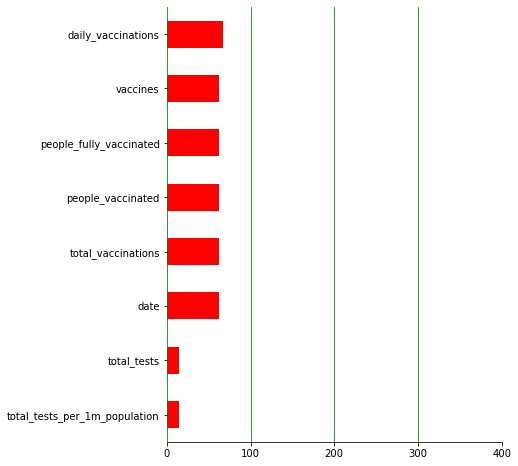

In [102]:
fig, ax = plt.subplots(figsize=(6,8))
ax = missing_one_plus.plot(kind='barh', xticks=[0,100,200,300,400], color='red')
plt.grid(axis='x', color ='green')
sns.despine(left=True, bottom=False)

In [103]:
combined = combined.replace(np.nan, 0)

In [104]:
#check again
combined.isnull().sum()

country                           0
continent                         0
total_confirmed                   0
total_deaths                      0
total_recovered                   0
active_cases                      0
serious_or_critical               0
total_cases_per_1m_population     0
total_deaths_per_1m_population    0
total_tests                       0
total_tests_per_1m_population     0
population                        0
date                              0
total_vaccinations                0
people_vaccinated                 0
people_fully_vaccinated           0
daily_vaccinations                0
vaccines                          0
GDP_2019                          0
life_expect_2018                  0
dtype: int64

# ANALYSIS<a id='analysis'></a>

In [105]:
combined.head(3)

,country,continent,total_confirmed,total_deaths,total_recovered,active_cases,serious_or_critical,total_cases_per_1m_population,total_deaths_per_1m_population,total_tests,total_tests_per_1m_population,population,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations,vaccines,GDP_2019,life_expect_2018
0,Afghanistan,Asia,56069,2462.0,49664.0,3943.0,1097.0,1418,62.0,328252.0,8300.0,39547320,2021-03-16,54000.0,54000.0,0.0,2862.0,Oxford/AstraZeneca,507.103432,66.026
1,Albania,Europe,119528,2106.0,83264.0,34158.0,46.0,41567,732.0,518673.0,180373.0,2875555,2021-03-17,33369.0,33369.0,0.0,1679.0,Pfizer/BioNTech,5353.244856,80.167
2,Algeria,Africa,115842,3051.0,80347.0,32444.0,15.0,2608,69.0,0.0,0.0,44411333,2021-02-19,75000.0,75000.0,0.0,3748.0,Sputnik V,3973.964072,77.938


Kind of vaccines available currently

In [106]:
combined.groupby(["vaccines"])["vaccines"].count()

vaccines
0                                                                                     62
Covaxin, Oxford/AstraZeneca                                                            1
EpiVacCorona, Sputnik V                                                                1
Johnson&Johnson                                                                        1
Johnson&Johnson, Moderna, Pfizer/BioNTech                                              1
Moderna                                                                                1
Moderna, Oxford/AstraZeneca                                                            1
Moderna, Oxford/AstraZeneca, Pfizer/BioNTech                                          23
Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sputnik V             1
Moderna, Pfizer/BioNTech                                                               6
Oxford/AstraZeneca                                                                    31
Oxford/Astra

#### Bar Graphs

Bar Graph to visualize top 20 vaccinated countries

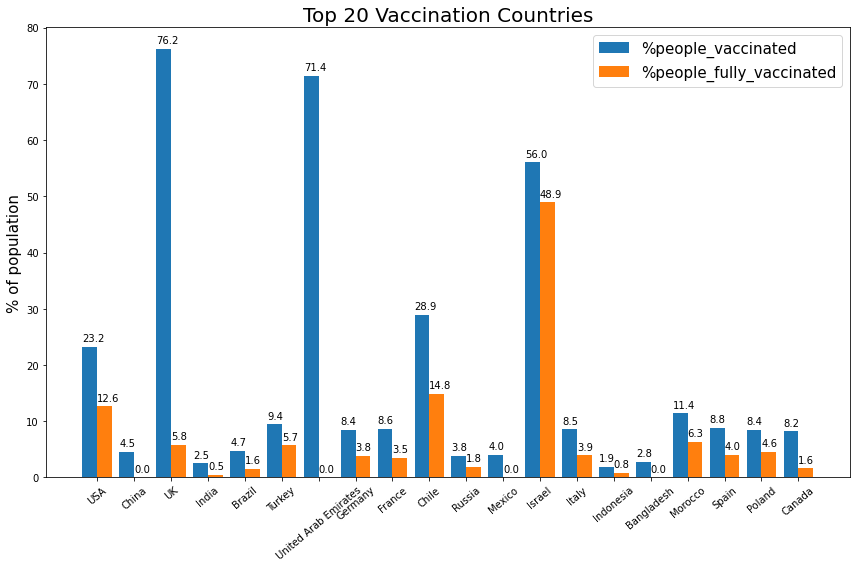

In [107]:
#Percentage of vaccination in top 20 countries having people get vaccinated 

top20 = main_data[['country','people_vaccinated', 'people_fully_vaccinated', 'population']].sort_values(by = ['people_vaccinated'], ascending = False).head(20)
top20['%people_vacc/population'] = top20['people_vaccinated']/top20['population']*100
top20['%people_fully_vacc/population'] = top20['people_fully_vaccinated']/top20['population']*100
top20

labels = top20['country']

x = np.arange(len(labels)) # label locations
width = 0.4 # width of bars

fig, ax = plt.subplots(figsize = (12,8))
rects1 = ax.bar(x - width/2, top20['%people_vacc/population'], width, label='%people_vaccinated')
rects2 = ax.bar(x + width/2, top20['%people_fully_vacc/population'], width, label='%people_fully_vaccinated')

#add texts for labels, title and xtick labels
ax.set_ylabel('% of population', fontsize = 15)
ax.set_title('Top 20 Vaccination Countries', fontsize = 20)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize = 10, rotation = 40 )
ax.legend(fontsize = 15)

for bar1 in rects1:
    yval = round(bar1.get_height(),1)
    plt.text(bar1.get_x(), yval + 1, yval)

for bar2 in rects2:
    yval = round(bar2.get_height(),1)
    plt.text(bar2.get_x(), yval + 1, yval)


fig.tight_layout()
plt.show()

Bar graph to visualize top 20 countries have highly total deaths

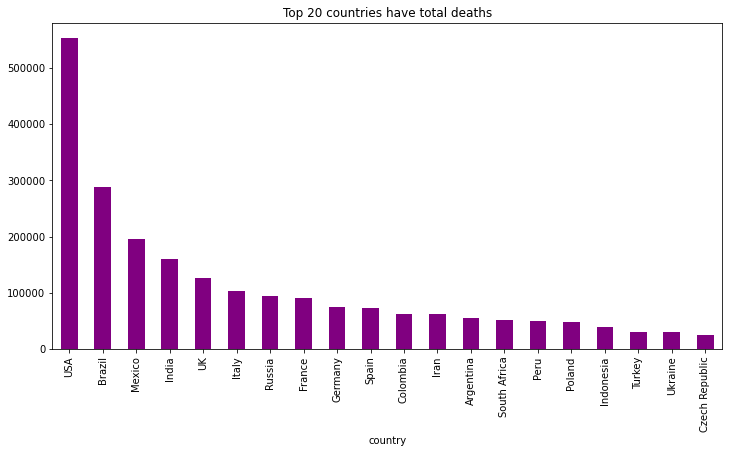

In [109]:
group = combined.groupby("country")
group["total_deaths"].max().sort_values(ascending = False).head(20).plot.bar(figsize = (12 , 6) , title = "Top 20 countries have total deaths",color = 'purple')

Checking top 20 countries that have highly mortality rate

Create a column 'mortality_rate'

In [110]:
combined["mortality_rate"] = combined["total_deaths"]/combined["population"]*100

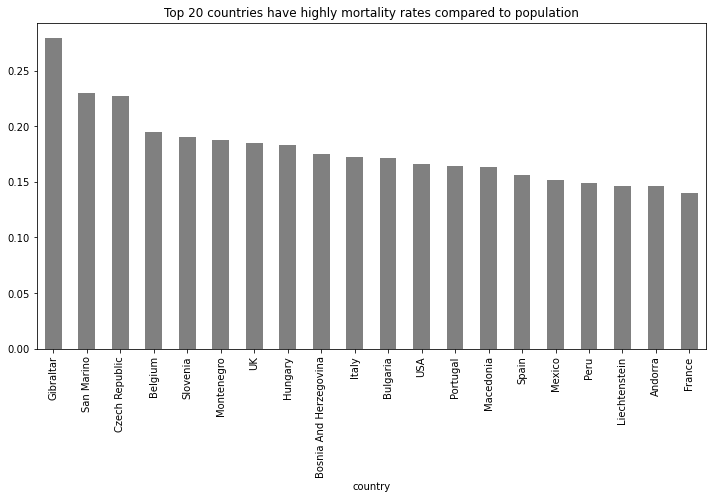

In [111]:
group["mortality_rate"].max().sort_values(ascending = False).head(20).plot.bar(figsize = (12 , 6) , title = "Top 20 countries have highly mortality rates compared to population",color = 'grey')

Bar graph to visualize population that has high vaccination rate

Calculating the vaccine_rate

In [123]:
combined["vaccine_rate"] = combined["total_vaccinations"]/combined["population"]*100

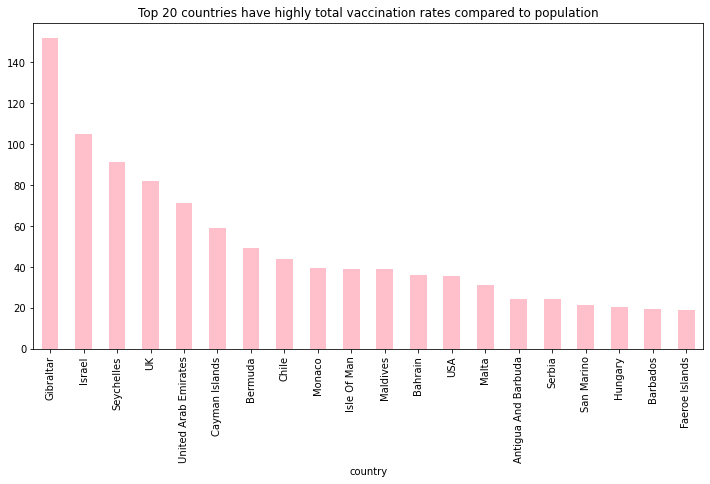

In [113]:
group["vaccine_rate"].max().sort_values(ascending = False).head(20).plot.bar(figsize = (12 , 6) , title = "Top 20 countries have highly total vaccination rates compared to population",color = 'pink')

## Covid Cases by Continents

In [114]:
continent = main_data.groupby("continent",as_index=False)[["total_deaths","active_cases","people_vaccinated","people_fully_vaccinated","population"]].sum()
continent.head(6)

,continent,total_deaths,active_cases,people_vaccinated,people_fully_vaccinated,population
0,Africa,109146.0,322930.0,5722300.0,2563824.0,1363223788
1,Asia,413987.0,1410594.0,140373081.0,19481764.0,4634772460
2,Australia/Oceania,1109.0,17603.0,267754.0,0.0,42646227
3,Europe,874801.0,8275875.0,99817005.0,25047269.0,752929511
4,North America,799325.0,7798877.0,87042481.0,42639965.0,592387976
5,South America,510183.0,1561707.0,19998392.0,7051557.0,433284328


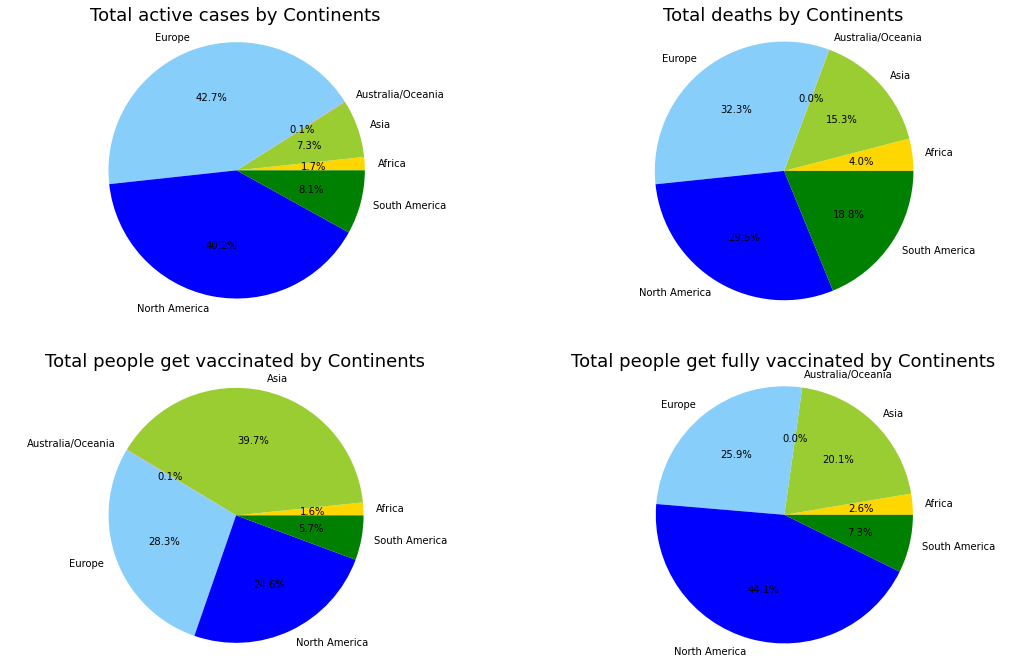

In [115]:
%matplotlib inline
labels = "Africa", "Asia", "Australia/Oceania", "Europe","North America","South America"
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','blue','green']
fig = plt.figure(figsize=(18,18))

ax1 = fig.add_subplot(3,2,1)
ax2 = fig.add_subplot(3,2,2)
ax3 = fig.add_subplot(3,2,3)
ax4 = fig.add_subplot(3,2,4)
# Plot

ax1.pie(continent['active_cases'], labels=labels, colors=colors,autopct='%1.1f%%')
ax1.set_title('Total active cases by Continents',fontsize = 18)
ax1.axis('equal')


# Plot
ax2.pie(continent['total_deaths'], labels=labels, colors=colors,autopct='%1.1f%%')
ax2.set_title('Total deaths by Continents',fontsize = 18)
ax2.axis('equal')

# Plot
ax3.pie(continent['people_vaccinated'],labels=labels, colors=colors,autopct='%1.1f%%')
ax3.set_title('Total people get vaccinated by Continents',fontsize = 18)
ax3.axis('equal')

# Plot
ax4.pie(continent['people_fully_vaccinated'],labels=labels, colors=colors,autopct='%1.1f%%')
ax4.set_title('Total people get fully vaccinated by Continents',fontsize = 18)
ax4.axis('equal')
plt.show()

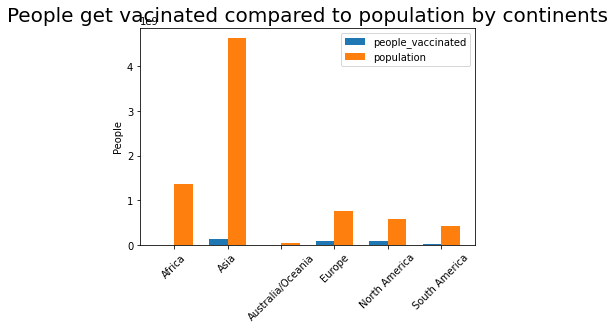

In [116]:
people_vaccinated = continent["people_vaccinated"]
population = continent["population"]
width = 0.35  # the width of the bars
ind = np.arange(len(people_vaccinated))
fig, ax = plt.subplots()
rects1 = ax.bar(ind - width/2, people_vaccinated, width, 
                label='people_vaccinated')
rects2 = ax.bar(ind + width/2, population, width, 
                label='population')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('People')
ax.set_title('People get vacinated compared to population by continents',fontsize=20)
ax.set_xticks(ind)
ax.set_xticklabels(("Africa", "Asia", "Australia/Oceania", "Europe","North America","South America"),rotation=45)
ax.legend()

### Boxplots

___Life Expectancy by GDP___

In [121]:
df= pd.read_csv('combine.csv')


#divide file to 4 groups by GDP
GDP_1 = df[df['GDP_2019'] <= 2276.333279]
GDP_2 = df[df['GDP_2019'] > 2276.333279][df['GDP_2019'] <= 7411.836116]
GDP_3 = df[df['GDP_2019'] > 7411.836116][df['GDP_2019'] <= 25946.182190]
GDP_4 = df[df['GDP_2019'] > 25946.18219]

#Dummy variable
GDP_1["GDP"] = "GDP1"
GDP_2["GDP"] = "GDP2"
GDP_3["GDP"] = "GDP3"
GDP_4["GDP"] = "GDP4"
times1 =[GDP_1[['life_expect_2018', "GDP"]],GDP_2[['life_expect_2018', "GDP"]]
        ,GDP_3[['life_expect_2018', "GDP"]] ,GDP_4[['life_expect_2018', "GDP"]]]

times2 =[GDP_1[['total_deaths_per_1m_population', "GDP"]],GDP_2[['total_deaths_per_1m_population', "GDP"]]
        ,GDP_3[['total_deaths_per_1m_population', "GDP"]] ,GDP_4[['total_deaths_per_1m_population', "GDP"]]]

times3 =[GDP_1[['total_cases_per_1m_population', "GDP"]],GDP_2[['total_cases_per_1m_population', "GDP"]]
        ,GDP_3[['total_cases_per_1m_population', "GDP"]] ,GDP_4[['total_cases_per_1m_population', "GDP"]]]

times4 =[GDP_1[['total_tests_per_1m_population', "GDP"]],GDP_2[['total_tests_per_1m_population', "GDP"]]
        ,GDP_3[['total_tests_per_1m_population', "GDP"]] ,GDP_4[['total_tests_per_1m_population', "GDP"]]]

times5 =[GDP_1[['total_tests_per_1m_population', "GDP"]],GDP_2[['total_tests_per_1m_population', "GDP"]]
        ,GDP_3[['total_tests_per_1m_population', "GDP"]] ,GDP_4[['total_tests_per_1m_population', "GDP"]]]
allTimes1 = pd.concat(times1)

allTimes2 = pd.concat(times2)
allTimes3 = pd.concat(times3)
allTimes4 = pd.concat(times4)
allTimes5 = pd.concat(times5)

<ipython-input-121-d6a64b84b1d5>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  GDP_2 = df[df['GDP_2019'] > 2276.333279][df['GDP_2019'] <= 7411.836116]
<ipython-input-121-d6a64b84b1d5>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  GDP_3 = df[df['GDP_2019'] > 7411.836116][df['GDP_2019'] <= 25946.182190]
<ipython-input-121-d6a64b84b1d5>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GDP_1["GDP"] = "GDP1"
<ipython-input-121-d6a64b84b1d5>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guid

Text(0.5, 0, '2019 GDP low to high')

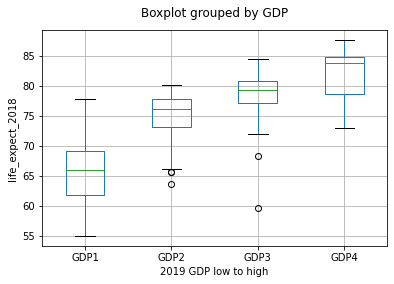

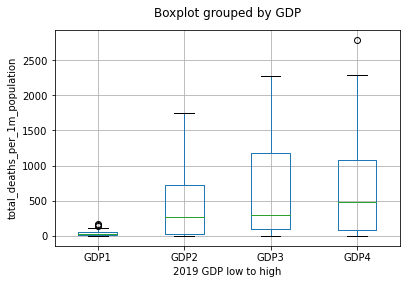

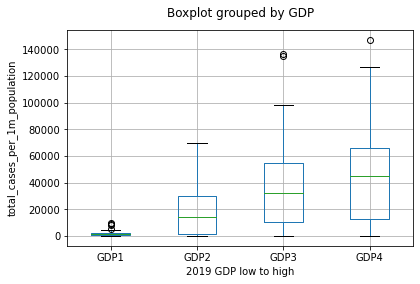

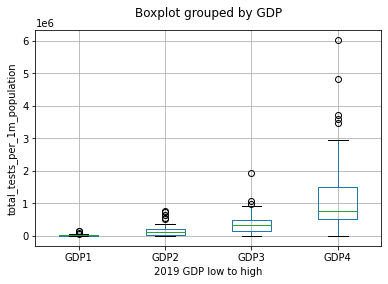

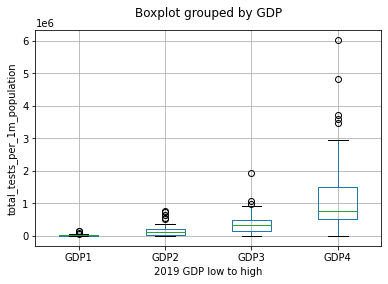

In [122]:
# plt.figure(figsize=(20,4))
ax = allTimes1.boxplot(by="GDP")
ax.set_title('')
ax.set_ylabel("life_expect_2018")
ax.set_xlabel("2019 GDP low to high")

ax22 = allTimes2.boxplot(by="GDP")
ax22.set_title('')
ax22.set_ylabel("total_deaths_per_1m_population")
ax22.set_xlabel("2019 GDP low to high")

ax33=allTimes3.boxplot(by="GDP")
ax33.set_title('')
ax33.set_ylabel("total_cases_per_1m_population")
ax33.set_xlabel("2019 GDP low to high")

ax44=allTimes4.boxplot(by="GDP")
ax44.set_title('')
ax44.set_ylabel("total_tests_per_1m_population")
ax44.set_xlabel("2019 GDP low to high")

ax55=allTimes5.boxplot(by="GDP")
ax55.set_title('')
ax55.set_ylabel("total_tests_per_1m_population")
ax55.set_xlabel("2019 GDP low to high")

# FIND CORRELATIONS<a id='find_corr'></a>

The correlation analysis of the combined dataset is performed below:

## Correlations Plots<a id='corr_plots'></a>

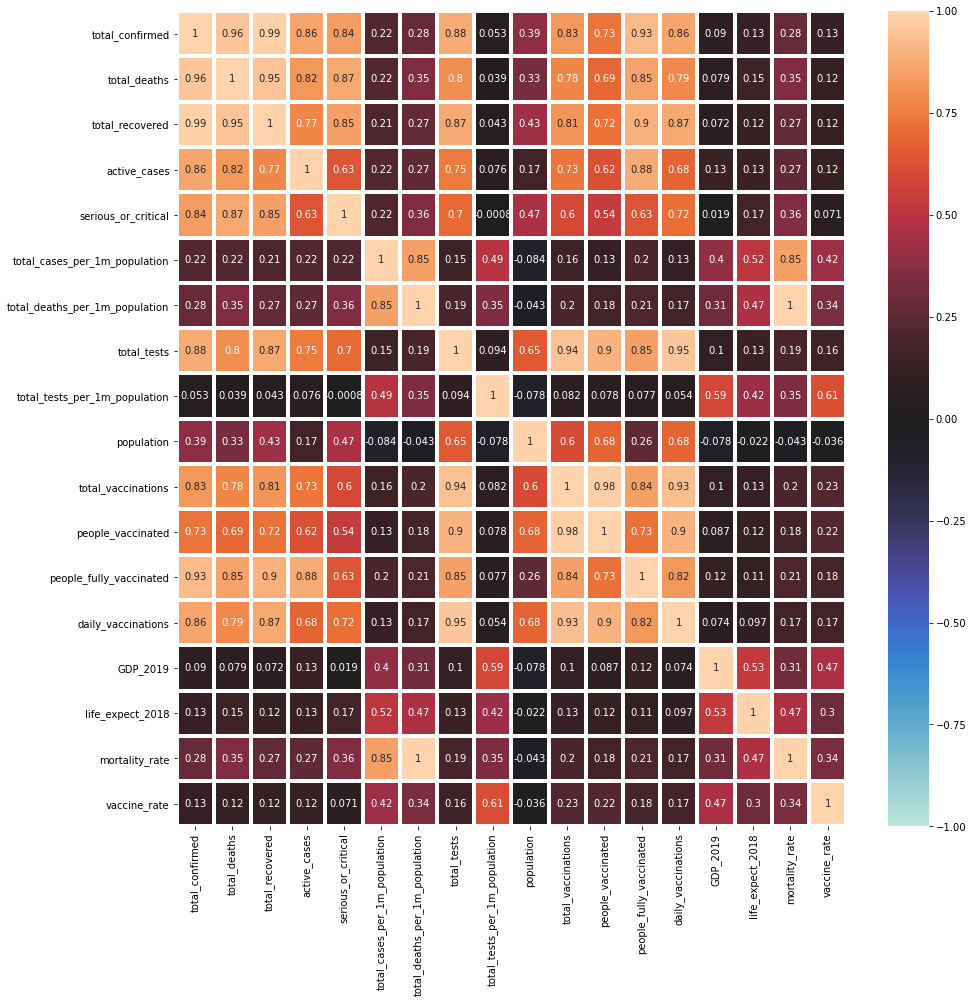

In [117]:
#overall correlation of the combined dataset is:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(combined.corr(), annot=True, vmin = -1, vmax = 1, center = 0, linewidths=3, ax=ax)
plt.show()

### Filter and sort only the correlations with 'vaccine rate'

In [118]:
correlations = combined.corr()
display(correlations.head(3))
correlations = correlations['vaccine_rate'].sort_values()

,total_confirmed,total_deaths,total_recovered,active_cases,serious_or_critical,total_cases_per_1m_population,total_deaths_per_1m_population,total_tests,total_tests_per_1m_population,population,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations,GDP_2019,life_expect_2018,mortality_rate,vaccine_rate
total_confirmed,1.000000,0.958755,0.988479,0.860727,0.836456,0.222132,0.282232,0.878745,0.052708,0.385052,0.827429,0.729139,0.929166,0.861632,0.089631,0.132304,0.282231,0.128101
total_deaths,0.958755,1.000000,0.946497,0.822442,0.872896,0.222107,0.351887,0.802813,0.038634,0.334177,0.777808,0.693243,0.851736,0.786518,0.078530,0.152556,0.351871,0.123286
total_recovered,0.988479,0.946497,1.000000,0.773846,0.850355,0.210672,0.270360,0.872525,0.043377,0.429922,0.812566,0.722145,0.895173,0.869538,0.071669,0.123916,0.270350,0.123822


To clearly analyze the positive and negative correlation of the combined dataset positive and negative correlation graphs are plotted

In [119]:
pos_corr = correlations[correlations >= 0]
neg_corr = correlations[correlations < 0]

### Positive Correlations Plot<a id='pos_corr_plot'></a>

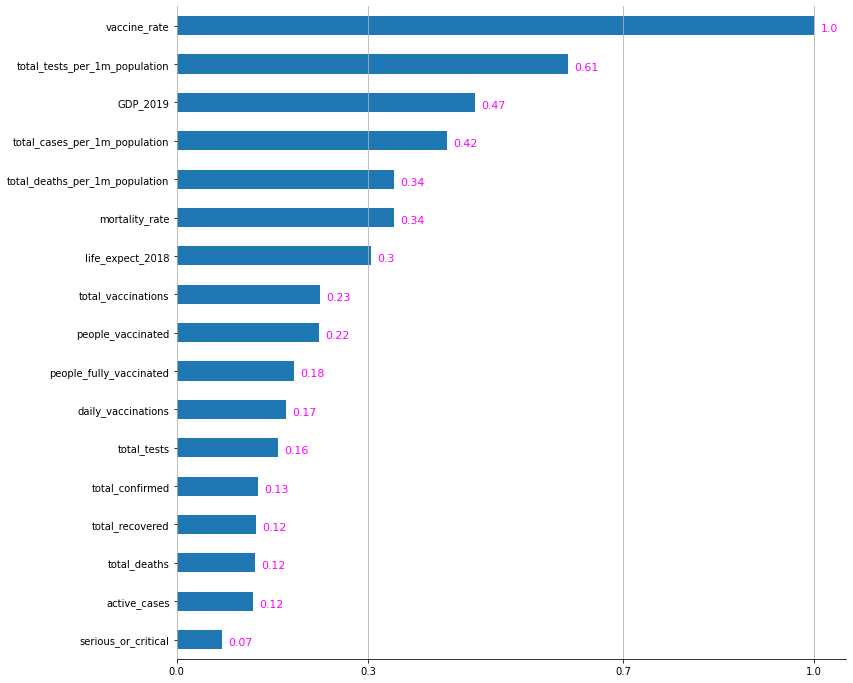

In [120]:
fig, ax = plt.subplots(figsize=(12,12))
ax = pos_corr.plot(kind='barh', xticks=[0,0.3,0.7,1]) # Series.plot
# for each of the bars in axis
for bar in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(bar.get_width()+.01, bar.get_y()+.1, str(round(bar.get_width(), 2)), fontsize=11,color='magenta')
plt.grid(axis='x')
sns.despine(left=True, bottom=False)

### Negative Correlations Plot<a id='neg_corr_plot'></a>

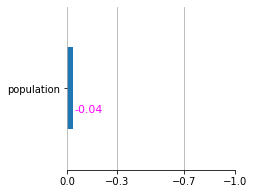

In [122]:
fig, ax = plt.subplots(figsize=(3,3))
ax = neg_corr.plot(kind='barh', xticks=[0,-0.3,-0.7,-1]) # Series.plot
# for each of the bars in axis
for bar in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(bar.get_width()-.01, bar.get_y()+.4, str(round(bar.get_width(), 2)), fontsize=11, color='magenta')
plt.grid(axis='x')
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
sns.despine(left=True, bottom=False)

## CORRELATION ANALYSIS<a id='corr_analysis'></a>

### Overall Correlation analysis

#### 1. How much confirmed cases are being cured?

From the correlation table, we can conclude that the confirmed cases has a high possibility to be cured due to the high positive correlation of 0.99.

#### 2. Why does population have negative correlation?

The population variable displays a very weak correlation because, from the analysis, we can see that the overall population in the world, still needs more vaccinations, or precautions against COVID-19.

#### 3. From the correlation table, can we confirm that many people are getting vaccinated?

Yes. The number of people getting vaccinated and the total number of vaccinations reflect a strong positive correlation of 0.98. So, we can say that a lot of people are getting vaccinated.

#### 4. What is the effect of mortality rate after COVID-19 stuck?

The mortality rate displayed from the analysis is very high. There is a strong positive correlation of 1 for mortality rate of total deaths per 1 million.

#### 5. Is it possible to expect death if COVID-19 is confirmed?

From the correlation analysis, it is possible. This is because, confirmed cases to death correlation displays a very strong positive correlation of 0.96.

### Correlation between vaccination rate and other variables

#### 6. Mortality rate is high when infection rate has a high correlation of 0.85. 

From the correlation table, we saw a 85% correlation between mortality rate and infection rate. Therefore, to save lifes, Covid prevention is important. 

#### 7. Why does population have negative correlation?

The -0.036 correlation between population and vaccine rate shows that there is no relation between population and vaccine rate.

#### 8. GDP and death per million has a correlation of 0. 31. 

While this number is not high. It is a surprise to see higher GDP country is not able to create a negative correlation with death per million figure.

#### 9. GDP and vaccine rate has a correlation of 0.47

High GDP countrties on the other hand, does have the ability to provide somewhat higher vaccine rate. Therefore, the death rate may drop later. 

## CONCLUSION<a id='conclusion'></a>

#### The overall conclusion we get from performing data wrangling and analysis of the COVID-19 vaccination dataset is, the world is facing a very economy crisis and the pandemic has also put a lot of pressure on the health of each and every individuals. Also, this situation still has a long way to go before it becomes normal

#### With reducing life expectancy and higher risk of COVID-19 infection making everyone susceptible to other lifelong health issues, it is best advised to take up vaccinations that are available to prevent the spread. 